# Demonstration of the LSD class

In this tutorial, we highlight the basic functionality of the LSD class. This includes loading in LSD profiles, make a quick graph, slicing the data, and slightly more advanced capabilities such as normalizing the profiles and changing the LSD weights (wpol and wint in LSD)

In [1]:
import specpolFlow.iolsd as iolsd
import matplotlib.pyplot as plt
import numpy as np

loading specpolFlow package


## 1. Loading and displaying LSD profiles

In [2]:
#iolsd.read_lsd is used to read lsd data into an object
lsd1 = iolsd.read_lsd('SampleData/SampleLSD.s')

the variables inside the lsd profile are arrays of values, including
* vel; the velocity grid 
* specI and specSigI; the Stokes I profile and its uncertainties
* specV and specSigV; the Stokes V polarization profile and its uncertainties
* specN1 and specSigN1; the Null1 profile and its uncertainties
* specN2 and specSigN2; the (optional) Null2 profile and its uncertainties 
* header; the header of the file that was read to create the lsd_prof

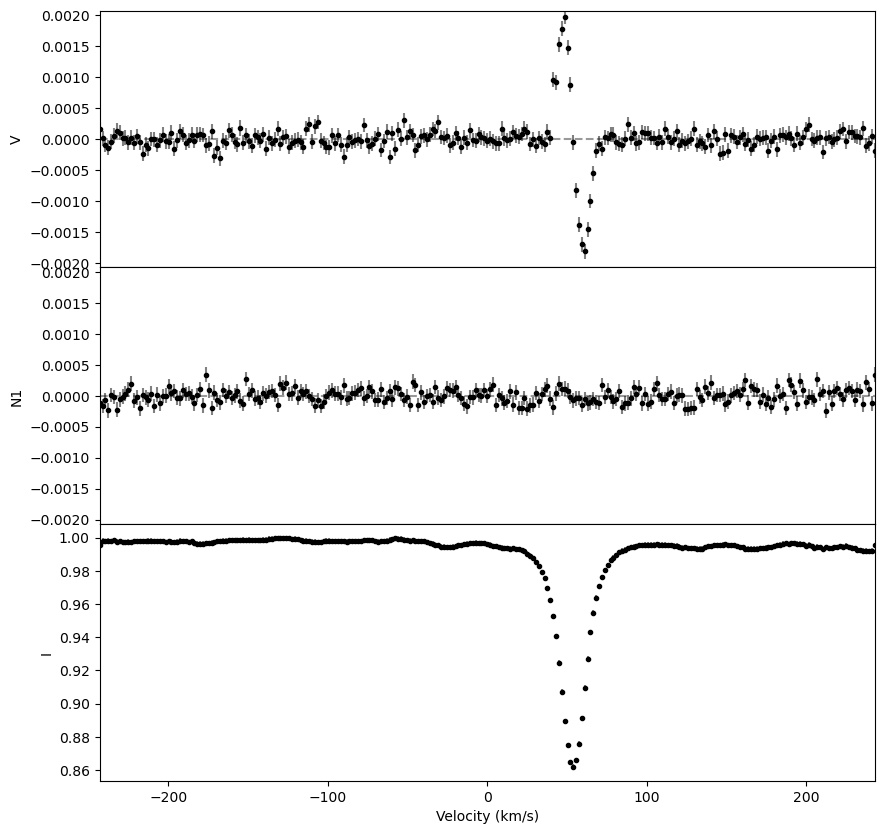

In [3]:
#iolsd.plot_lsd is used to plot lsd data. 
#figsize is an optional argument, which changes the size of the image created.
#the default size is (10,10)
fig, ax = lsd1.plot(figsize=(10,10))

## 2. Slicing LSD profiles

55
55


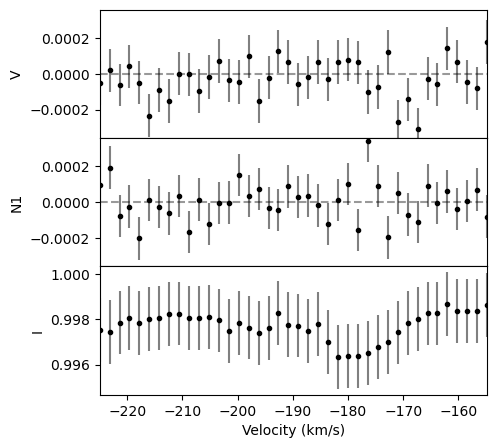

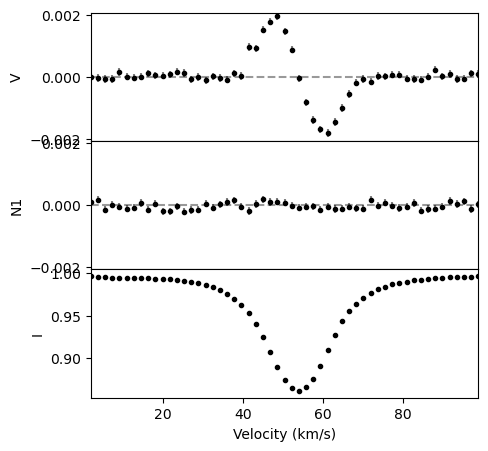

In [4]:
#you are able to select subsections of lsd data in the same way you do with arrays;
#this will create an lsd profile with the items from indices 10 to 50. 
lsdslice = lsd1[10:50]
fig, ax = lsdslice.plot(figsize=(5,5))

#this will create an lsd profile with all data points where vel>0 and vel<100
lsdpos = lsd1[lsd1.vel>0]
lsdpos = lsdpos[lsdpos.vel<100]
fig, ax = lsdpos.plot(figsize=(5,5))

# You can also return the length of the LSD profile using
print(lsdpos.npix)
#or
print(len(lsdpos))

## 3. Normalization, weights, and velocity shifts

(<Figure size 500x500 with 3 Axes>,
 array([<AxesSubplot:ylabel='V'>, <AxesSubplot:ylabel='N1'>,
        <AxesSubplot:xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

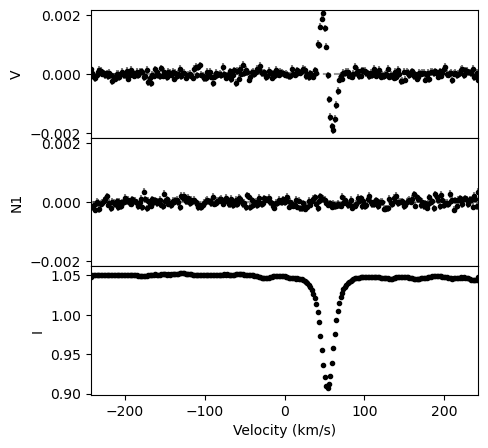

In [5]:
# We can normalize a LSD profile to a different continnum. 
# The Stokes parameters and the error bars are recomputed accordingly.

lsdnorm = lsd1.norm(0.95)

lsdnorm.plot(figsize=(5,5))

(<Figure size 500x500 with 3 Axes>,
 array([<AxesSubplot:ylabel='V'>, <AxesSubplot:ylabel='N1'>,
        <AxesSubplot:xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

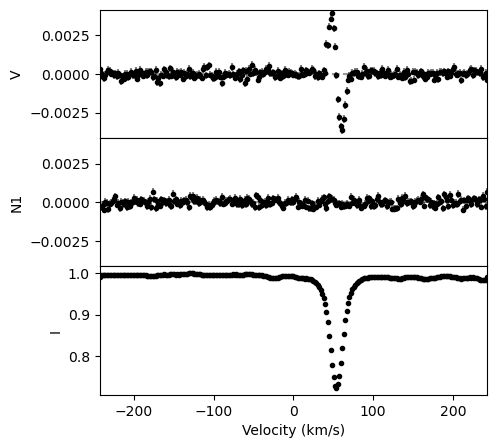

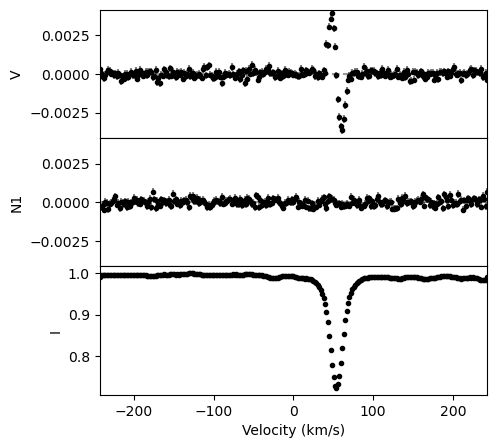

In [16]:
# We can also adjust the LSD weights two ways. 

# 1. if you want to adjust to a new wint and wpol from old ones:
wint_old = 0.1
wpol_old = 60 
wint_new = 0.2
wpol_new = 120

newlsd = lsd1.set_weights(wint_old, wpol_old, wint_new, wpol_new)
newlsd.plot(figsize=(5,5))

# 2. If you have already calculated the scale factors to go from old to new, you can simply do:
scale_int = 2.0
scale_pol = 2.0

newlsd = lsd1.scale(scale_int, scale_pol)
newlsd.plot(figsize=(5,5))

# (In fact, the set_weigths function just calls the scale function with new/old.)

(<Figure size 500x500 with 3 Axes>,
 array([<AxesSubplot:ylabel='V'>, <AxesSubplot:ylabel='N1'>,
        <AxesSubplot:xlabel='Velocity (km/s)', ylabel='I'>], dtype=object))

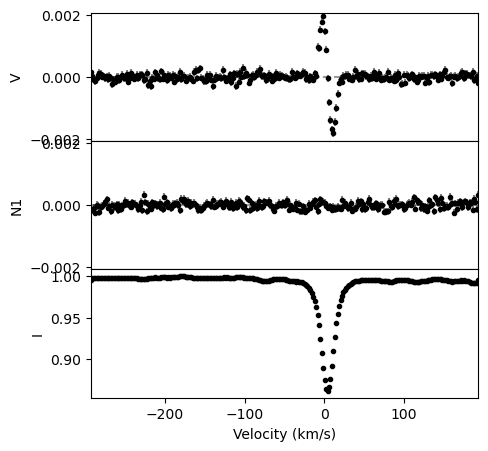

In [15]:
# Finally, you can apply a radial velocity shift to the LSD profile. 

lsd1.vshift(50.0).plot(figsize=(5,5))

# Note that in the above, I did not save the shifted profile to a new variable. 
# lsd1.vshift() return a LSD object, on which I called the plot function.
# So this whole command returns a figure. 
# I could manipulate this figure some more with 
# ax, fig = lsd1.vshift(50.0).plot(figsize=(5,5))
# If I wanted to actually keep the shifted LSD profile, I would do
# newlsd = lsd1.vshift(50.0)